# ASFPM 2020 Demo

## USGS API

Examples of how to retrieve data directly from the USGS REST API for:

##### I. Peak Streamflow

##### II. Daily Streamflow

##### III. Instantaneous Streamflow

---

#### Useful Links:

[REST Web Services](https://waterservices.usgs.gov/rest/): REST is a "URL friendly" way to retrieve data over the web.

[USGS Gages Map](https://maps.waterdata.usgs.gov/mapper/index.html): Retrieve a Gage ID from an online map.

In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
from utils import Url

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Enter Gage ID and State

In [2]:
gage = "03221646"
state = "OH"

---

# I. Peak Streamflow

### Generate URL's

In [3]:
# Auto generate url string
stats_uri = f'https://nwis.waterdata.usgs.gov/{state}/nwis/peak?site_no={gage}&agency_cd=USGS&format=rdb'
alt_stats_uri = f'https://nwis.waterdata.usgs.gov/usa/nwis/peak/?site_no={gage}'
gage_url = f'https://waterdata.usgs.gov/nwis/inventory?agency_code=USGS&site_no={gage}'

# Print Clickable Link
Url(gage_url)

Url(_Url__url='https://waterdata.usgs.gov/nwis/inventory?agency_code=USGS&site_no=03221646')

### Retrieve Metadata

In [4]:
r = requests.get(stats_uri)
response_text = r.text.split('\n')

if not r.ok or '<!DOCTYPE html>' in response_text:
    print(f"No Content Found!\n\n Verify Site info using Link Above")
    r = requests.get(alt_stats_uri)
    stats_uri = f'https://nwis.waterdata.usgs.gov/nwis/peak?site_no={gage}&agency_cd=USGS&format=rdb'
    if not r.ok:
        print(f"Strike 2: No Peak Flow for this site!\n Verify Site info using Link Above") 

    
if r.ok and "No sites/data found" not in r.text:
    for line in response_text:
        if "#" in line:
            print(line.replace('\t',''))
else:
    print(f"No Data: Please verify site and state info or click link above") 

#
# U.S. Geological Survey
# National Water Information System
# Retrieved: 2020-05-30 11:52:11 EDT
#
# ---------------------------------- WARNING ----------------------------------------
# Some of the data that you have obtained from this U.S. Geological Survey database
# may not have received Director's approval. Any such data values are qualified
# as provisional and are subject to revision. Provisional data are released on the
# condition that neither the USGS nor the United States Government may be held liable
# for any damages resulting from its use.
#
# More data may be available offline.
# For more information on these data,  contact  Ohio Water Data Inquiries.
# This file contains the annual peak streamflow data.
#
# This information includes the following fields:
#
#  agency_cd     Agency Code
#  site_no       USGS station number
#  peak_dt       Date of peak streamflow (format YYYY-MM-DD)
#  peak_tm       Time of peak streamflow (24 hour format, 00:00 - 23:59)
#  peak_va    

### Get tabular data

In [5]:
# df = pd.read_table(stats_uri, comment = "#")
# df.head()

In [6]:
df = pd.read_table(stats_uri, comment = "#")
df = df[1:].reset_index(drop=True)

if 'peak_va' in df.columns:
    df['peak_va'] = pd.to_numeric(df['peak_va'] )
    df['peak_dt'] = pd.to_datetime(df['peak_dt'])
else:
    print("No Peak Streamflow Found in Data!")

# Preview Data
df.head()

,agency_cd,site_no,peak_dt,peak_tm,peak_va,peak_cd,gage_ht,gage_ht_cd,year_last_pk,ag_dt,ag_tm,ag_gage_ht,ag_gage_ht_cd
0,USGS,03221646,2015-06-20,NaN,16100,6,20.64,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,03221646,2015-12-29,NaN,11400,6,17.39,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,03221646,2017-05-06,NaN,8000,6,14.83,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,03221646,2018-04-04,03:45,20300,NaN,22.63,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,03221646,2019-02-08,03:23,16600,NaN,20.37,NaN,NaN,NaN,NaN,NaN,NaN


###  Plot Results

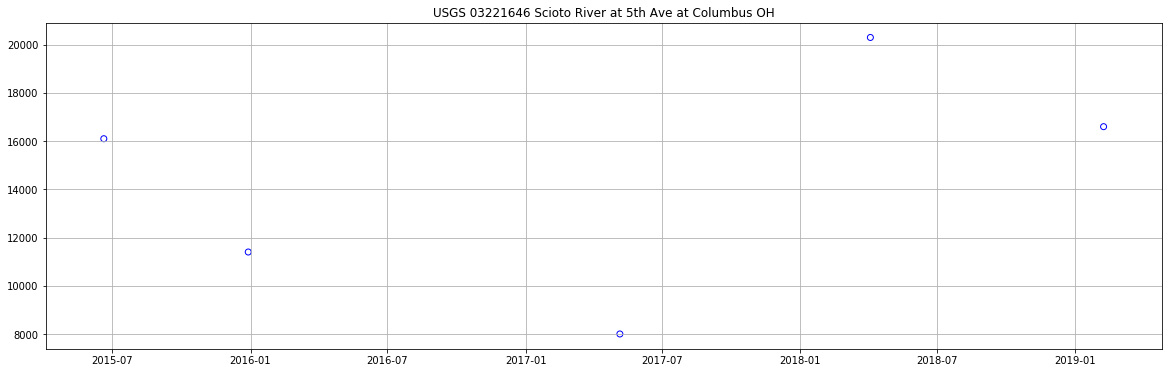

In [7]:
if '# Sites in this file include:\r' in response_text:
    idx = response_text.index('# Sites in this file include:\r') + 1
    gage_id_text = response_text[idx].replace('\r','').replace('#  ','')
else:
    gage_id_text = gage

fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(x= df.peak_dt.values, y = df.peak_va.values,  color="none", edgecolor="blue");ax.grid();
ax.set_title(gage_id_text);

---

## II. Daily Streamflow

### Enter Starting Year

NOTE: Retrieves data by *Water Year*



In [8]:
year = 2018

### Generate URL

In [9]:
# Auto generate url string
daily_uri = f"https://waterdata.usgs.gov/{state}/nwis/dv?cb_00060=on&format=rdb&site_no={gage}&referred_module=sw&period=&begin_date={year-1}-10-01&end_date={year}-9-30"

# Print Clickable Link
Url(gage_url)

Url(_Url__url='https://waterdata.usgs.gov/nwis/inventory?agency_code=USGS&site_no=03221646')

### Retrieve Metadata

In [10]:
r = requests.get(daily_uri)
response_text = r.text.split('\n')

if not r.ok or '<!DOCTYPE html>' in response_text:
    print(f"No Content Found!\n\n Verify Site info using Link Above")
    
if r.ok and "No sites/data found" not in r.text:
    for line in response_text:
        if "#" in line:
            print(line.replace('\t',''))
else:
    print(f"No Data: Please verify site and state info or click link above") 

# ---------------------------------- WARNING ----------------------------------------
# Some of the data that you have obtained from this U.S. Geological Survey database
# may not have received Director's approval. Any such data values are qualified
# as provisional and are subject to revision. Provisional data are released on the
# condition that neither the USGS nor the United States Government may be held liable
# for any damages resulting from its use.
#
# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement
#
# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output
# Automated-retrieval info: https://help.waterdata.usgs.gov/faq/automated-retrievals
#
# Contact:   gs-w_support_nwisweb@usgs.gov
# retrieved: 2020-05-30 11:52:12 EDT       (vaww01)
#
# Data for the following 1 site(s) are contained in this file
#    USGS 03221646 Scioto River at 5th Ave at Columbus OH
# ---------------------------------------------------

### Get tabular data

In [11]:
df = pd.read_table(daily_uri, comment = "#")
df = df[1:].reset_index(drop=True)

if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'])
else:
    print("No Peak Streamflow Found in Data!")

# Preview Data
df.head()

,agency_cd,site_no,datetime,109046_00060_00003,109046_00060_00003_cd
0,USGS,03221646,2017-10-01,98.9,A
1,USGS,03221646,2017-10-02,98.0,A
2,USGS,03221646,2017-10-03,103,A
3,USGS,03221646,2017-10-04,105,A
4,USGS,03221646,2017-10-05,167,A


### Select Column Name from table/metadata for daily flow vaules

In [14]:
daily_flow_col = "109046_00060_00003"

### Format Data 

In [15]:
# Convert the flow data to numeric
df[daily_flow_col] = pd.to_numeric(df[daily_flow_col])

# Get Gage ID info
if '# Sites in this file include:\r' in response_text:
    idx = response_text.index('# Sites in this file include:\r') + 1
    gage_id_text = response_text[idx].replace('\r','').replace('#  ','')
else:
    gage_id_text = gage

### Plot Results

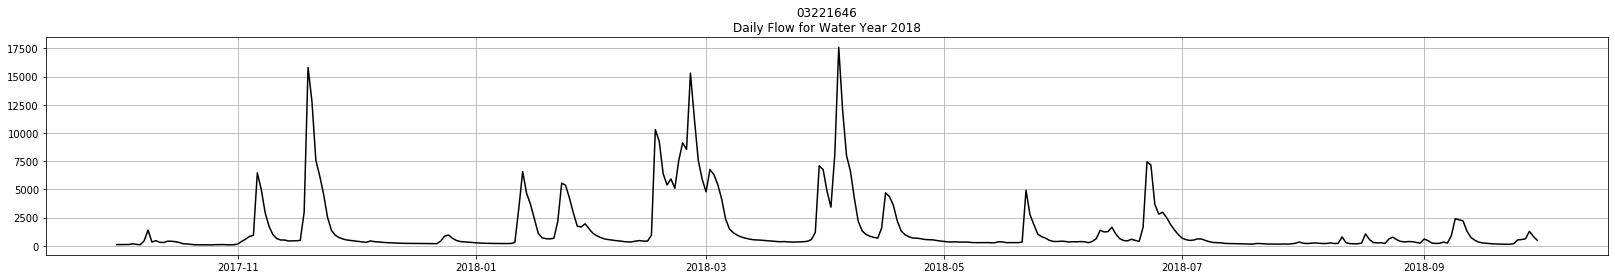

In [16]:
fig, ax = plt.subplots(figsize=(28,4))
ax.plot(df.datetime,df[daily_flow_col].values,  color="black");ax.grid();
ax.set_title(f'{gage_id_text}\nDaily Flow for Water Year {year}');

---

## III. Instantaneous Streamflow

### Enter Starting and Ending Dates


In [17]:
start_date = "2018-05-09"
end_date = "2019-05-31"

### Generate URL

In [18]:
# Auto generate url string
instantaneous_uri = f"https://waterservices.usgs.gov/nwis/iv/?format=rdb&sites={gage}&startDT={start_date}&endDT={end_date}&parameterCd=00060&siteStatus=all"

### Retrieve Metadata

In [19]:
r = requests.get(instantaneous_uri)
response_text = r.text.split('\n')

if not r.ok or '<!DOCTYPE html>' in response_text:
    print(f"No Content Found!\n\n Verify Site info using Link Above")
    
if r.ok and "No sites/data found" not in r.text:
    for line in response_text:
        if "#" in line:
            print(line.replace('\t',''))
else:
    print(f"No Data: Please verify site and state info or click link above") 

# ---------------------------------- WARNING ----------------------------------------
# Some of the data that you have obtained from this U.S. Geological Survey database may not 
# have received Director's approval.  Any such data values are qualified as provisional and 
# are subject to revision.  Provisional data are released on the condition that neither the 
# USGS nor the United States Government may be held liable for any damages resulting from its use.
#  Go to http://help.waterdata.usgs.gov/policies/provisional-data-statement for more information.
#
# File-format description:  http://help.waterdata.usgs.gov/faq/about-tab-delimited-output
# Automated-retrieval info: http://help.waterdata.usgs.gov/faq/automated-retrievals
#
# Contact:   gs-w_support_nwisweb@usgs.gov
# retrieved: 2020-05-30 11:52:30 -04:00(nadww02)
#
# Data for the following 1 site(s) are contained in this file
#    USGS 03221646 Scioto River at 5th Ave at Columbus OH
# --------------------------------------------

### Get tabular data

In [20]:
df = pd.read_table(instantaneous_uri, comment = "#")
df = df[1:].reset_index(drop=True)

if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'])
else:
    print("No Peak Streamflow Found in Data!")

# Preview Data
df.head()

,agency_cd,site_no,datetime,tz_cd,110317_00060,110317_00060_cd
0,USGS,03221646,2018-05-09 00:00:00,EDT,279,A
1,USGS,03221646,2018-05-09 00:15:00,EDT,279,A
2,USGS,03221646,2018-05-09 00:30:00,EDT,279,A
3,USGS,03221646,2018-05-09 00:45:00,EDT,283,A
4,USGS,03221646,2018-05-09 01:00:00,EDT,279,A


### Select Column Name from table/metadata for daily flow vaules

In [23]:
inst_flow_col = "110317_00060"

### Format Data 

In [24]:
# Convert the flow data to numeric
df[inst_flow_col] = pd.to_numeric(df[inst_flow_col])

# Get Gage ID info
if '# Sites in this file include:\r' in response_text:
    idx = response_text.index('# Sites in this file include:\r') + 1
    gage_id_text = response_text[idx].replace('\r','').replace('#  ','')
else:
    gage_id_text = gage

###  Plot Results

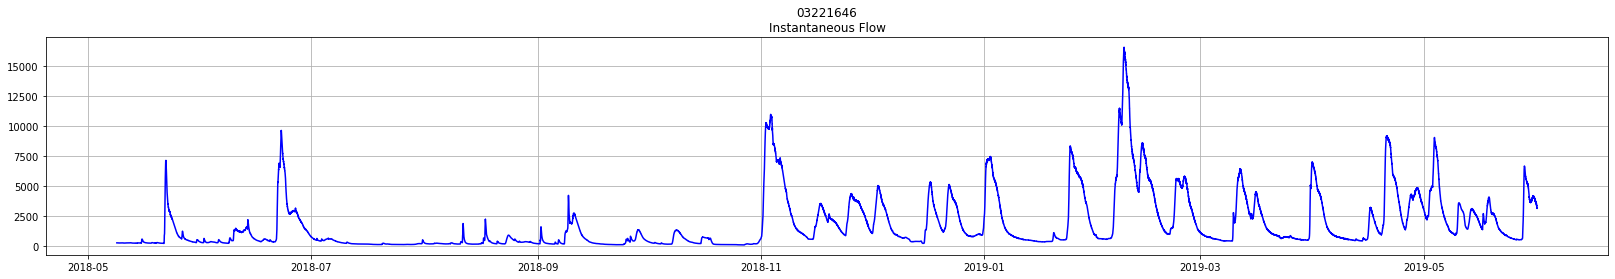

In [25]:
fig, ax = plt.subplots(figsize=(28,4))
ax.plot(df.datetime,df[inst_flow_col].values,  color="blue");ax.grid();
ax.set_title(f'{gage_id_text}\nInstantaneous Flow');

# END